# Taller GIS-DAY

## 1. Descarga e instalación de Anaconda

https://www.anaconda.com/download/success

## 2. Registro y descarga de datos de Copernicus

https://data.marine.copernicus.eu/products

### 2.1 Productos:

#### 2.1.1 Temperatura Superficial del mar (sst)
https://data.marine.copernicus.eu/product/GLOBAL_MULTIYEAR_PHY_001_030/description

#### 2.1.2 Clorofila-a
https://data.marine.copernicus.eu/product/GLOBAL_ANALYSISFORECAST_BGC_001_028/description

#### Hacemos esto para movernos a nuestra carpeta
#### WINDOWS
E:

chdir gis-day-DVDC-main

##### LINUX O MAC   cd

#### Luego hacemos:
jupyter notebook

In [4]:
ls

README.md
chl.png
cmems_mod_glo_bgc-pft_anfc_0.25deg_P1D-m_1731951242616.nc
cmems_mod_glo_phy_my_0.083deg_P1D-m_1731864183329.nc
dvdc.ipynb
m-complementario/
temperatura.png


In [ ]:
pip install xarray cartopy cmocean netcdf4 h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [2]:
## Cargamos paquetes para lectura del fichero netcdf y graficado
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

from cmocean import cm

In [4]:
## Leemos el fichero netcdf de temperatura
temp_data = xr.open_dataset("cmems_mod_glo_phy_my_0.083deg_P1D-m_1731864183329.nc")

temp_data

<xarray.Dataset> Size: 732kB
Dimensions:    (time: 3, depth: 2, latitude: 169, longitude: 180)
Coordinates:
  * time       (time) datetime64[ns] 24B 2021-06-28 2021-06-29 2021-06-30
  * depth      (depth) float32 8B 0.494 1.541
  * latitude   (latitude) float32 676B 18.0 18.08 18.17 ... 31.83 31.92 32.0
  * longitude  (longitude) float32 720B -120.0 -119.9 -119.8 ... -105.2 -105.1
Data variables:
    thetao     (time, depth, latitude, longitude) float32 730kB ...
Attributes:
    Conventions:       CF-1.11
    title:             daily mean fields from Global Ocean Physics Analysis a...
    institution:       MERCATOR OCEAN
    source:            MERCATOR GLORYS12V1
    history:           2023/06/01 16:20:05 MERCATOR OCEAN Netcdf creation
    references:        http://www.mercator-ocean.fr
    comment:           CMEMS product
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  GLOBAL_MULTIYEAR_PHY_001_030
    subset:datasetId:  cmems_mod_glo_phy_my_0.083deg_P1D-m_202311
    subset:date:       2024-11-17T17:23:03.331Z

In [5]:
## Cargamos las variables
temp = temp_data.thetao.values
lon_temp = temp_data.longitude.values
lat_temp = temp_data.latitude.values

In [6]:
## Extraemos un paso de tiempo y una profundidad de la variable thetao
temp_cut = temp[0, 0, :, :]

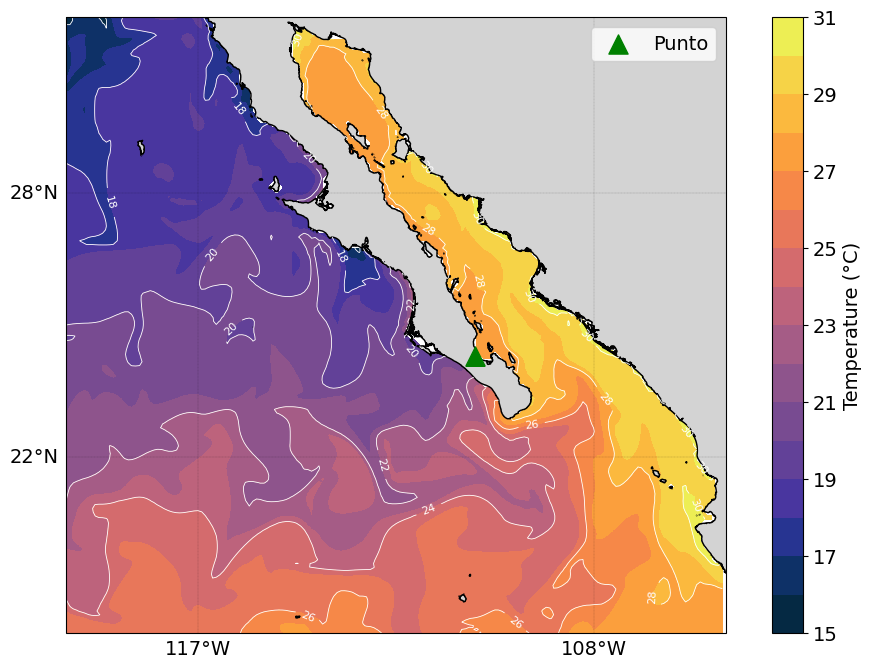

In [7]:
## Creamos mapa de temperatura
plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(12,8))
#ax = plt.axes(projection=ccrs.PlateCarree())
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())


#ax.add_feature(cartopy.feature.LAND, )
#ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

extent = [-120.0, -105.0, 18, 32]

ax.set_extent(extent)

coast = cfeature.GSHHSFeature(scale='f')
ax.add_feature(coast, facecolor="lightgray")
#ax.add_feature(cfeature.LAND, facecolor="lightgray")
#ax.coastlines(resolution='10m')
gl=ax.gridlines(draw_labels=True, linewidth=0.2, color='k', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator([-108, -117])
gl.ylocator = mticker.FixedLocator([22, 28])
gl.top_labels = False
gl.right_labels = False

Q = ax.contourf(lon_temp, lat_temp, temp_cut, levels=18, cmap= cm.thermal)
QQ = ax.contour(lon_temp, lat_temp, temp_cut, levels=8, colors="w", 
               linewidths =0.6)

cbar = plt.colorbar(Q)

ax.clabel(QQ, inline=True,
           fontsize=8, inline_spacing=8, fmt="%1.0f")

cbar.set_label('Temperature (°C)')

ax.scatter(-110.7, 24.3, s=190, c='g', marker="^", 
            transform = ccrs.PlateCarree(), label='Punto', zorder=10)
ax.legend(loc = "best")

#plt.title('')
plt.savefig('temperatura.png', dpi=450, bbox_inches='tight')

In [8]:
## Leemos el fichero netcdf de clorofila
chl_data = xr.open_dataset("cmems_mod_glo_bgc-pft_anfc_0.25deg_P1D-m_1731951242616.nc")

chl_data

<xarray.Dataset> Size: 1MB
Dimensions:    (time: 32, depth: 3, latitude: 57, longitude: 61)
Coordinates:
  * time       (time) datetime64[ns] 256B 2024-10-22 2024-10-23 ... 2024-11-22
  * depth      (depth) float32 12B 0.494 1.541 2.646
  * latitude   (latitude) float32 228B 18.0 18.25 18.5 18.75 ... 31.5 31.75 32.0
  * longitude  (longitude) float32 244B -120.0 -119.8 -119.5 ... -105.2 -105.0
Data variables:
    chl        (time, depth, latitude, longitude) float32 1MB ...
Attributes:
    Conventions:       CF-1.11
    title:             daily mean fields from Global Ocean Biogeochemistry An...
    institution:       Mercator Ocean
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    contact:           https://marine.copernicus.eu/contact
    references:        http://marine.copernicus.eu
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  GLOBAL_ANALYSISFORECAST_BGC_001_028
    subset:datasetId:  cmems_mod_glo_bgc-pft_anfc_0.25deg_P1D-m_202311
    subset:date:       2024-11-18T17:34:02.616Z

In [9]:
## Cargamos las variables
chl = chl_data.chl.values
lon_chl = chl_data.longitude.values
lat_chl = chl_data.latitude.values

In [10]:
chl_cut = chl[0, 0, :, :]

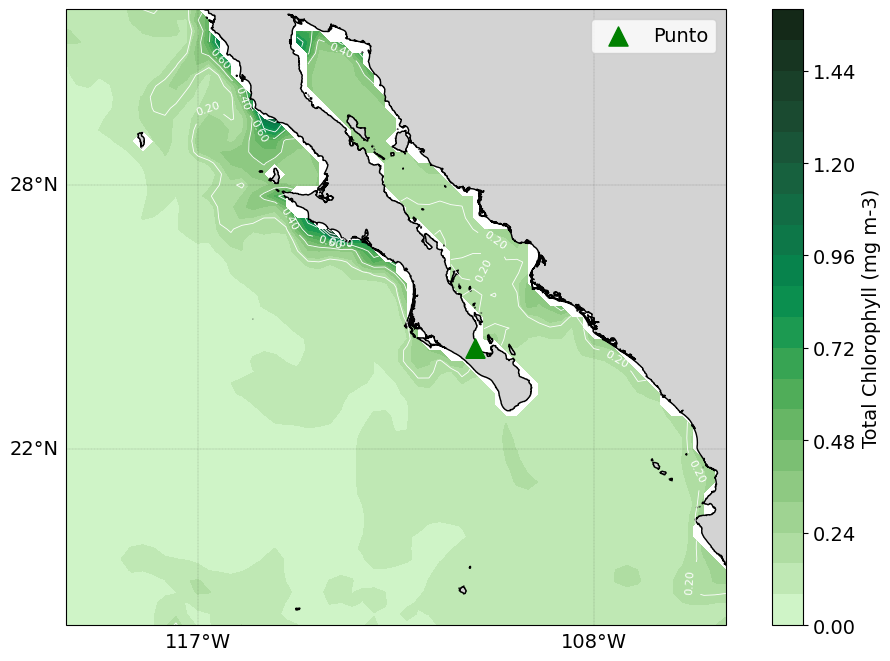

In [11]:
## Creamos mapa de clorofila
plt.rcParams.update({'font.size': 14})

fig = plt.figure(figsize=(12,8))
#ax = plt.axes(projection=ccrs.PlateCarree())
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())


#ax.add_feature(cartopy.feature.LAND, )
#ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

extent = [-120.0, -105.0, 18, 32]

ax.set_extent(extent)

coast = cfeature.GSHHSFeature(scale='f')
ax.add_feature(coast, facecolor="lightgray")
#ax.add_feature(cfeature.LAND, facecolor="lightgray")
#ax.coastlines(resolution='10m')
gl=ax.gridlines(draw_labels=True, linewidth=0.2, color='k', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator([-108, -117])
gl.ylocator = mticker.FixedLocator([22, 28])
gl.top_labels = False
gl.right_labels = False

Q = ax.contourf(lon_chl, lat_chl, chl_cut, levels=18, cmap= cm.algae)
QQ = ax.contour(lon_chl, lat_chl, chl_cut, levels=8, colors="w", 
               linewidths =0.6)

cbar = plt.colorbar(Q)

ax.clabel(QQ, inline=True,
           fontsize=8, inline_spacing=8, fmt="%1.2f")

cbar.set_label('Total Chlorophyll (mg m-3)')

ax.scatter(-110.7, 24.3, s=190, c='g', marker="^", 
            transform = ccrs.PlateCarree(), label='Punto', zorder=10)
ax.legend(loc = "best")

#plt.title('')
plt.savefig('chl.png', dpi=450, bbox_inches='tight')

In [12]:
lat_chl

array([18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  ,
       20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  , 22.25,
       22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  , 24.25, 24.5 ,
       24.75, 25.  , 25.25, 25.5 , 25.75, 26.  , 26.25, 26.5 , 26.75,
       27.  , 27.25, 27.5 , 27.75, 28.  , 28.25, 28.5 , 28.75, 29.  ,
       29.25, 29.5 , 29.75, 30.  , 30.25, 30.5 , 30.75, 31.  , 31.25,
       31.5 , 31.75, 32.  ], dtype=float32)

In [13]:
## Buscamos los indices donde los valores de longitud y latitud se corresponden con nuestro punto de interés 
lon_ind = np.argwhere(lon_chl == -117)
lat_ind = np.argwhere(lat_chl == 22)

In [14]:
lat_ind

array([[16]])

In [15]:
## Seleccionamos la serie temporal de clorofila en el punto y cargamos la variable tiempo
chl_timeseries = np.squeeze(chl[:, 0, lat_ind, lon_ind])

time = chl_data.time.values

Text(0, 0.5, 'Total Chlorophyll (mg m-3)')

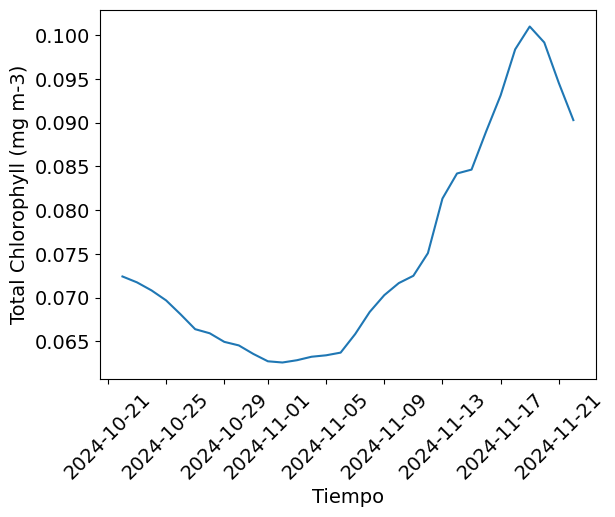

In [16]:
## Creamos grafico de serie temporal de clorofila
plt.plot(time, chl_timeseries)
plt.xticks(rotation=45)
plt.xlabel('Tiempo')
plt.ylabel('Total Chlorophyll (mg m-3)')